In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [2]:
def acf_pacf(x, qtd_lag):
    fig = plt.figure(figsize=(16,10))
    ax1 = fig.add_subplot(221)
    fig = sm.graphics.tsa.plot_acf(x, lags=qtd_lag, ax=ax1)
    ax2 = fig.add_subplot(222)
    fig = sm.graphics.tsa.plot_pacf(x, lags=qtd_lag, ax=ax2)
    plt.show()

In [3]:
pd.set_option('display.max_columns', None)

sudeste_path = '../data/parquet/regiao/SUDESTE.parquet'

df = pd.read_parquet(sudeste_path)

In [4]:
df.head()

,Nome do RCBP,Sexo,Data de Nascimento,Idade,Raca/Cor,Nacionalidade,Naturalidade Estado,Naturalidade,Grau de Instrução,Estado Civil,Código Profissão,Nome Profissão,Estado Endereço,Cidade Endereço,Descrição da Topografia,Código da Topografia,Descrição da Morfologia,Código da Morfologia,Descrição da Doenca,Código da Doenca,Descrição da Doenca Infantil,Código da Doenca Infantil,Descrição da Doenca Adulto Jovem,Código da Doenca Adulto Jovem,Indicador de Caso Raro,Meio de Diagnostico,Extensão,Lateralidade,Estadiamento,TNM,Status Vital,Tipo do Obito,Data do Óbito,Data de Último Contato,Data de Diagnostico,Metástase à distância,Regiao
0,RCBP CAMPINAS-UNICAMP,MASCULINO,16/03/1975,30.0,BRANCO,BRASIL,SÃO PAULO,None,SEM INFORMAÇÃO,CASADO,516.0,TRABALHADORES NOS SERVIÇOS DE EMBELEZAMENTO E ...,SÃO PAULO,CAMPINAS,"RETO, SOE",C209,NEOPLASIA MALIGNA,80003.0,RETO,C20,None,None,None,None,0.0,SDO,METÁSTASE,SEM INFORMAÇÃO,99 - SEM INFORMAÇÃO,999,MORTO,CÂNCER,07/10/2005,07/10/2005,07/10/2005,None,SUDESTE
1,RCBP CAMPINAS-UNICAMP,FEMININO,24/05/1950,53.0,SEM INFORMAÇÃO,Não informado,Não informado,Não Informado,SEM INFORMAÇÃO,SEM INFORMAÇÃO,0.0,SEM INFORMAÇÃO\t,SÃO PAULO,CAMPINAS,COLON DESCENDENTE,C186,ADENOCARCINOMA TUBULAR,82113.0,COLON DESCENDENTE,C186,None,None,None,None,0.0,HISTOLOGIA DO TUMOR PRIMÁRIO,SEM INFORMAÇÃO,SEM INFORMAÇÃO,99,999,MORTO,SEM INFORMAÇÃO,30/01/2007,30/01/2007,18/07/2003,None,SUDESTE
2,RCBP CAMPINAS-UNICAMP,FEMININO,02/09/1951,51.0,PARDA,BRASIL,SÃO PAULO,None,SEM INFORMAÇÃO,SOLTEIRO,0.0,SEM INFORMAÇÃO\t,SÃO PAULO,CAMPINAS,"MAMA , SOE",C509,CARCINOMA DUCTAL INFILTRANTE,85003.0,"MAMA , SOE",C509,None,None,None,None,0.0,HISTOLOGIA DO TUMOR PRIMÁRIO,SEM INFORMAÇÃO,SEM INFORMAÇÃO,99,999,MORTO,CÂNCER,03/07/2005,03/07/2005,16/05/2003,None,SUDESTE
3,RCBP CAMPINAS-UNICAMP,FEMININO,21/11/1929,73.0,SEM INFORMAÇÃO,Não informado,Não informado,Não Informado,SEM INFORMAÇÃO,SEM INFORMAÇÃO,0.0,SEM INFORMAÇÃO\t,SÃO PAULO,CAMPINAS,PELE DO MEMBRO SUPERIOR E DO OMBRO,C446,"CARCINOMA DE CELULAS ESCAMOSAS, SOE",80703.0,PELE DO MEMBRO SUPERIOR E DO OMBRO,C446,None,None,None,None,0.0,HISTOLOGIA DO TUMOR PRIMÁRIO,SEM INFORMAÇÃO,SEM INFORMAÇÃO,99,999,VIVO,None,None,28/07/2010,01/04/2003,None,SUDESTE
4,RCBP CAMPINAS-UNICAMP,MASCULINO,03/07/1934,71.0,BRANCO,BRASIL,SÃO PAULO,None,SEM INFORMAÇÃO,SOLTEIRO,0.0,SEM INFORMAÇÃO\t,SÃO PAULO,CAMPINAS,"LOCALIZACAO PRIMARIA DESCONHECIDA, SOE",C809,NEOPLASIA MALIGNA,80003.0,LOCALIZACAO PRIMARIA DESCONHECIDA,C80,None,None,None,None,0.0,SDO,SEM INFORMAÇÃO,SEM INFORMAÇÃO,99 - SEM INFORMAÇÃO,999,MORTO,CÂNCER,21/10/2005,21/10/2005,21/10/2005,None,SUDESTE


In [5]:
df.shape

(1134504, 37)

# Verificação das Datas

In [6]:
df['Data de Diagnostico'].count()

1134504

In [7]:
df['Data de Diagnostico'] = pd.to_datetime(df['Data de Diagnostico'], format='%d/%m/%Y')

In [8]:
df['Data de Diagnostico'].count()

1134504

In [9]:
df = df.sort_values(by='Data de Diagnostico')

In [10]:
df.head()

,Nome do RCBP,Sexo,Data de Nascimento,Idade,Raca/Cor,Nacionalidade,Naturalidade Estado,Naturalidade,Grau de Instrução,Estado Civil,Código Profissão,Nome Profissão,Estado Endereço,Cidade Endereço,Descrição da Topografia,Código da Topografia,Descrição da Morfologia,Código da Morfologia,Descrição da Doenca,Código da Doenca,Descrição da Doenca Infantil,Código da Doenca Infantil,Descrição da Doenca Adulto Jovem,Código da Doenca Adulto Jovem,Indicador de Caso Raro,Meio de Diagnostico,Extensão,Lateralidade,Estadiamento,TNM,Status Vital,Tipo do Obito,Data do Óbito,Data de Último Contato,Data de Diagnostico,Metástase à distância,Regiao
471,RCBP CAMPINAS-UNICAMP,FEMININO,05/09/1926,64.0,SEM INFORMAÇÃO,BRASIL,Não informado,None,SEM INFORMAÇÃO,SEM INFORMAÇÃO,821.0,OPERADORES DE INSTALAÇÕES E EQUIPAMENTOS DE PR...,SÃO PAULO,CAMPINAS,"COLON, SOE",1539,NEOPLASMA MALIGNO,80003.0,"COLON, SOE",C189,None,None,None,None,0.0,SDO,SEM INFORMAÇÃO,SEM INFORMAÇÃO,99 - SEM INFORMAÇÃO,999,MORTO,CÂNCER,01/01/1991,01/01/1991,1991-01-01,None,SUDESTE
10930,RCBP CAMPINAS-UNICAMP,FEMININO,28/01/1932,58.0,SEM INFORMAÇÃO,BRASIL,Não informado,None,SEM INFORMAÇÃO,SEM INFORMAÇÃO,821.0,OPERADORES DE INSTALAÇÕES E EQUIPAMENTOS DE PR...,SÃO PAULO,CAMPINAS,"COLON, SOE",1539,NEOPLASMA MALIGNO,80003.0,"COLON, SOE",C189,None,None,None,None,0.0,SDO,SEM INFORMAÇÃO,SEM INFORMAÇÃO,99 - SEM INFORMAÇÃO,999,MORTO,CÂNCER,01/01/1991,01/01/1991,1991-01-01,None,SUDESTE
9461,RCBP CAMPINAS-UNICAMP,FEMININO,22/11/1910,80.0,SEM INFORMAÇÃO,BRASIL,Não informado,None,SEM INFORMAÇÃO,SEM INFORMAÇÃO,821.0,OPERADORES DE INSTALAÇÕES E EQUIPAMENTOS DE PR...,SÃO PAULO,CAMPINAS,COLO DO UTERO,1809,NEOPLASMA MALIGNO,80003.0,"COLO DO UTERO, SOE",C539,None,None,None,None,0.0,SDO,SEM INFORMAÇÃO,SEM INFORMAÇÃO,99 - SEM INFORMAÇÃO,999,MORTO,CÂNCER,01/01/1991,01/01/1991,1991-01-01,None,SUDESTE
12775,RCBP CAMPINAS-UNICAMP,MASCULINO,29/05/1933,57.0,BRANCO,ITALIA,Não informado,None,SEM INFORMAÇÃO,SEM INFORMAÇÃO,0.0,SEM INFORMAÇÃO\t,SÃO PAULO,CAMPINAS,ANGULO DIREITO DO COLON,1530,ADENOCARCINOMA TUBULAR,82113.0,FLEXURA HEPATICA DO COLON,C183,None,None,None,None,0.0,HISTOLOGIA DO TUMOR PRIMÁRIO,METÁSTASE,None,nan,nan,None,None,None,None,1991-01-02,None,SUDESTE
14231,RCBP CAMPINAS-UNICAMP,MASCULINO,13/08/1912,78.0,SEM INFORMAÇÃO,BRASIL,Não informado,None,SEM INFORMAÇÃO,SEM INFORMAÇÃO,722.0,TRABALHADORES DE CONFORMAÇÃO DE METAIS E DE CO...,SÃO PAULO,CAMPINAS,"COLON, SOE",1539,NEOPLASMA MALIGNO,80003.0,"COLON, SOE",C189,None,None,None,None,0.0,SDO,SEM INFORMAÇÃO,SEM INFORMAÇÃO,99 - SEM INFORMAÇÃO,999,MORTO,CÂNCER,02/01/1991,02/01/1991,1991-01-02,None,SUDESTE


In [11]:
df.tail()

,Nome do RCBP,Sexo,Data de Nascimento,Idade,Raca/Cor,Nacionalidade,Naturalidade Estado,Naturalidade,Grau de Instrução,Estado Civil,Código Profissão,Nome Profissão,Estado Endereço,Cidade Endereço,Descrição da Topografia,Código da Topografia,Descrição da Morfologia,Código da Morfologia,Descrição da Doenca,Código da Doenca,Descrição da Doenca Infantil,Código da Doenca Infantil,Descrição da Doenca Adulto Jovem,Código da Doenca Adulto Jovem,Indicador de Caso Raro,Meio de Diagnostico,Extensão,Lateralidade,Estadiamento,TNM,Status Vital,Tipo do Obito,Data do Óbito,Data de Último Contato,Data de Diagnostico,Metástase à distância,Regiao
2170934,RCBP JAHU,FEMININO,13/06/2003,17.0,BRANCO,BRASIL,SÃO PAULO,BARRA BONITA,FUNDAMENTAL II (5ª A 8ª SÉRIE),SOLTEIRO,0.0,SEM INFORMAÇÃO\t,SÃO PAULO,JAÚ,APENDICE CECAL (VERMIFORME),C181,"CARCINOMA NEUROENDOCRINO, SOE",82463.0,APENDICE (VERMIFORME),C181,Outros carcinomas malignos não especificados,XI-F,CARCINOMA DE CÓLON E RETO,8.6.1,0.0,HISTOLOGIA DO TUMOR PRIMÁRIO,LOCALIZADO,NÃO SE APLICA,IIA,3-0-0,VIVO,None,None,09/11/2021,2020-12-28,None,SUDESTE
2170987,RCBP JAHU,MASCULINO,28/03/1977,43.0,BRANCO,BRASIL,SÃO PAULO,SÃO PAULO,SUPERIOR COMPLETO,CASADO,30.0,OFICIAIS DE BOMBEIRO MILITAR \t,SÃO PAULO,JAÚ,CEREBRO,C710,"ASTROCITOMA, SOE",94003.0,CEREBRO,C710,None,None,None,None,0.0,HISTOLOGIA DO TUMOR PRIMÁRIO,LOCALIZADO,NÃO SE APLICA,99,9-9-9,VIVO,None,None,26/09/2022,2020-12-28,None,SUDESTE
2171386,RCBP JAHU,MASCULINO,30/03/1985,35.0,BRANCO,BRASIL,SÃO PAULO,JAÚ,SUPERIOR COMPLETO,CASADO,223.0,"PROFISSIONAIS DA MEDICINA, SAÚDE E AFINS \t",SÃO PAULO,JAÚ,MEDULA OSSEA,C421,MIELOMA MULTIPLO,97323.0,MIELOMA MULTIPLO,C900,None,None,None,None,0.0,HISTOLOGIA DO TUMOR PRIMÁRIO,NÃO SE APLICA,NÃO SE APLICA,88,8-8-8,VIVO,None,None,29/12/2022,2020-12-29,None,SUDESTE
2171460,RCBP JAHU,MASCULINO,13/08/1977,43.0,BRANCO,BRASIL,SÃO PAULO,JAÚ,FUNDAMENTAL I (1ª A 4ª SÉRIE),SOLTEIRO,0.0,SEM INFORMAÇÃO\t,SÃO PAULO,JAÚ,MEDULA OSSEA,C421,"DOENCA PROLIFERATIVA CRONICA, SOE",99603.0,"LEUCEMIA DE TIPO CELULAR, SOE",C95,None,None,None,None,0.0,HISTOLOGIA DO TUMOR PRIMÁRIO,NÃO SE APLICA,NÃO SE APLICA,88,8-8-8,VIVO,None,None,01/06/2021,2020-12-30,None,SUDESTE
2171515,RCBP JAHU,FEMININO,29/03/1931,89.0,BRANCO,BRASIL,SÃO PAULO,JAÚ,SUPERIOR COMPLETO,SOLTEIRO,0.0,SEM INFORMAÇÃO\t,SÃO PAULO,JAÚ,MEDULA OSSEA,C421,MIELOMA MULTIPLO,97323.0,MIELOMA MULTIPLO,C900,None,None,None,None,0.0,HISTOLOGIA DO TUMOR PRIMÁRIO,NÃO SE APLICA,NÃO SE APLICA,88,8-8-8,VIVO,None,None,11/06/2021,2020-12-31,None,SUDESTE


In [12]:
print(df['Data de Diagnostico'].min())
print(df['Data de Diagnostico'].max())

1991-01-01 00:00:00
2020-12-31 00:00:00


In [13]:
datas = pd.date_range(start='1991-01-01', end='2020-12-31', freq='ME')

In [14]:
print(len(datas))

360


In [15]:
n_unique_months = df['Data de Diagnostico'].dt.to_period('M').nunique()

print(n_unique_months)

360


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1134504 entries, 471 to 2171515
Data columns (total 37 columns):
 #   Column                            Non-Null Count    Dtype         
---  ------                            --------------    -----         
 0   Nome do RCBP                      1134504 non-null  object        
 1   Sexo                              1134504 non-null  object        
 2   Data de Nascimento                363126 non-null   object        
 3   Idade                             1062738 non-null  float64       
 4   Raca/Cor                          1134504 non-null  object        
 5   Nacionalidade                     360733 non-null   object        
 6   Naturalidade Estado               361144 non-null   object        
 7   Naturalidade                      256623 non-null   object        
 8   Grau de Instrução                 360696 non-null   object        
 9   Estado Civil                      358112 non-null   object        
 10  Código Profissão     

# Verificação Temporal por Doença

In [17]:
df_mama = df[df['Descrição da Doenca'].isin(['MAMA , SOE', 'QUADRANTE SUPERIOR EXTERNO DA MAMA', 'PROLONGAMENTO AXILAR DA MAMA',
                                            'QUADRANTE SUPERIOR INTERNO DA MAMA', 'CARCINOMA "IN SITU" DA MAMA, SOE',
                                            'PORCAO CENTRAL DA MAMA', 'QUADRANTE INFERIOR EXTERNO DA MAMA',
                                            'LESAO INVASIVA DA MAMA', 'QUADRANTE INFERIOR INTERNO DA MAMA', 'MAMA'])]

df_prostata = df[df['Descrição da Doenca'] == 'PROSTATA']

df_colo_utero = df[df['Descrição da Doenca'].isin(['COLO DO UTERO, SOE', 'OUTRAS PARTES DO COLO DO UTERO',
                                                  'LESAO INVASIVA DO COLO DO UTERO', 'COLO DO UTERO',
                                                  'CARCINOMA "IN SITU" DO COLO DO UTERO (CERVIX)'])]

df_pele = df[df['Descrição da Doenca'].isin(['PELE DE OUTRAS PARTES DA FACE, SOE', 'PELE DE OUTRAS PARTES DA FACE',
                                            'PELE DO MEMBRO INFERIOR E DO QUADRIL','PELE DA PALPEBRA E CANTO',
                                            'PELE DO TRONCO','NEOPLASIA MALIGNA DA PELE','PELE DO COURO CABELUDO E DO PESCOCO',
                                            'PELE DA ORELHA E CONDUTO AUDITIVO EXTERNO','PELE DO MEMBRO SUPERIOR E DO OMBRO',
                                            'PELE DOS MEMBROS SUPERIORES, INCLUINDO OMBRO','PELE DO LABIO',
                                            'PELE DA ORELHA E DO CONDUTO AUDITIVO EXTERNO','SARCOMA DE KAPOSI DA PELE',
                                            'PELE DA PALPEBRA, INCLUINDO CANTO','PELE DOS MEMBROS INFERIORES, INCLUINDO QUADRIL',
                                            'MELANOMA MALIGNO DA PELE, SOE','PELE, SOE','LESAO INVASIVA DA PELE',
                                            'MELANOMA MALIGNO INVASIVO DA PELE','PELE DE OUTRAS LOCALIZACOES',
                                            'OUTRAS NEOPLASIAS MALIGNAS DA PELE'])]

df_pulmao = df[df['Descrição da Doenca'].isin(['BRONQUIOS OU PULMOES, SOE', 'BRONQUIOS E PULMOES',
                                              'LESAO INVASIVA DOS BRONQUIOS E DOS PULMOES'])]

In [18]:
df_mama = df_mama.sort_values(by='Data de Diagnostico')
df_prostata = df_prostata.sort_values(by='Data de Diagnostico')
df_colo_utero = df_colo_utero.sort_values(by='Data de Diagnostico')
df_pele = df_pele.sort_values(by='Data de Diagnostico')
df_pulmao = df_pulmao.sort_values(by='Data de Diagnostico')

In [19]:
df_mama = df_mama.set_index('Data de Diagnostico')
df_prostata = df_prostata.set_index('Data de Diagnostico')
df_colo_utero = df_colo_utero.set_index('Data de Diagnostico')
df_pele = df_pele.set_index('Data de Diagnostico')
df_pulmao = df_pulmao.set_index('Data de Diagnostico')

In [20]:
result_mama = df_mama.resample("ME")['Nome do RCBP'].count()
result_prostata = df_prostata.resample("ME")['Nome do RCBP'].count()
result_colo_utero = df_colo_utero.resample("ME")['Nome do RCBP'].count()
result_pele = df_pele.resample("ME")['Nome do RCBP'].count()
result_pulmao = df_pulmao.resample("ME")['Nome do RCBP'].count()

#### Mama

<Axes: xlabel='Data de Diagnostico'>

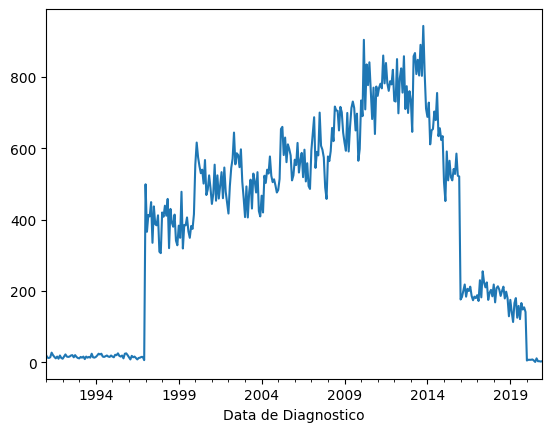

In [21]:
result_mama.plot()

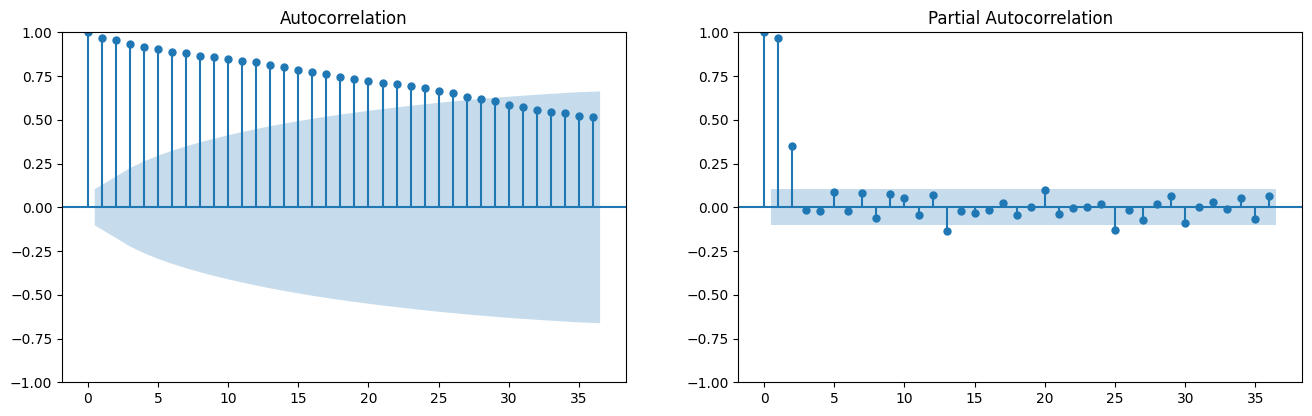

In [22]:
acf_pacf(result_mama.values, 36)

#### Prostata

<Axes: xlabel='Data de Diagnostico'>

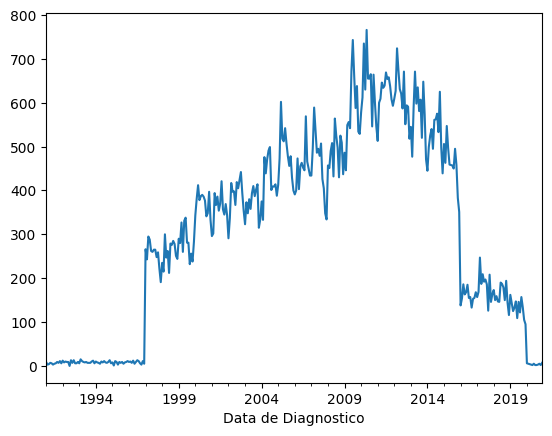

In [23]:
result_prostata.plot()

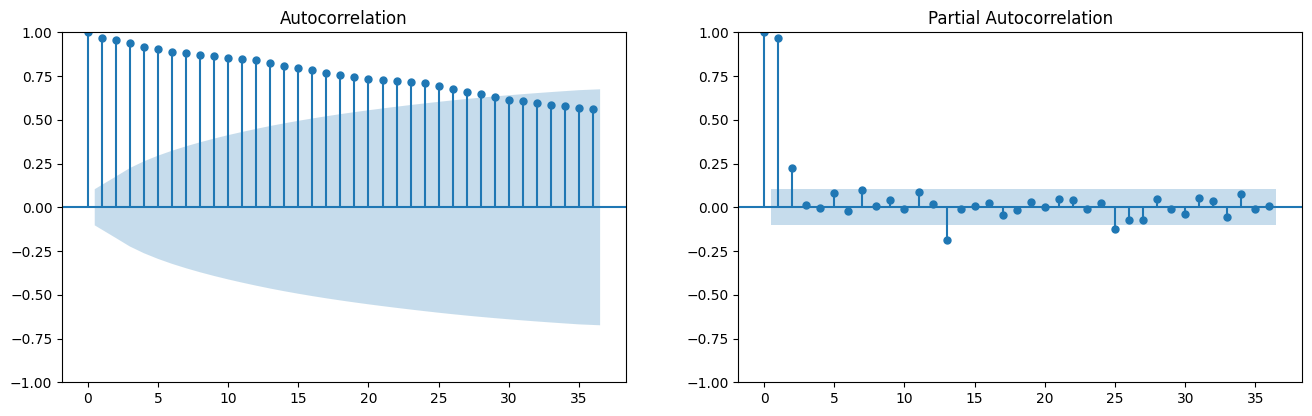

In [24]:
acf_pacf(result_prostata.values, 36)

#### Utero

<Axes: xlabel='Data de Diagnostico'>

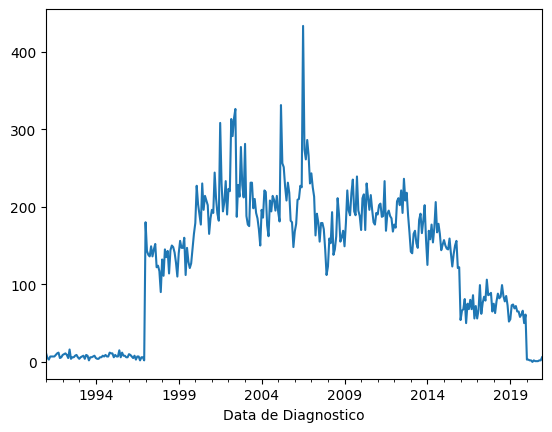

In [25]:
result_colo_utero.plot()

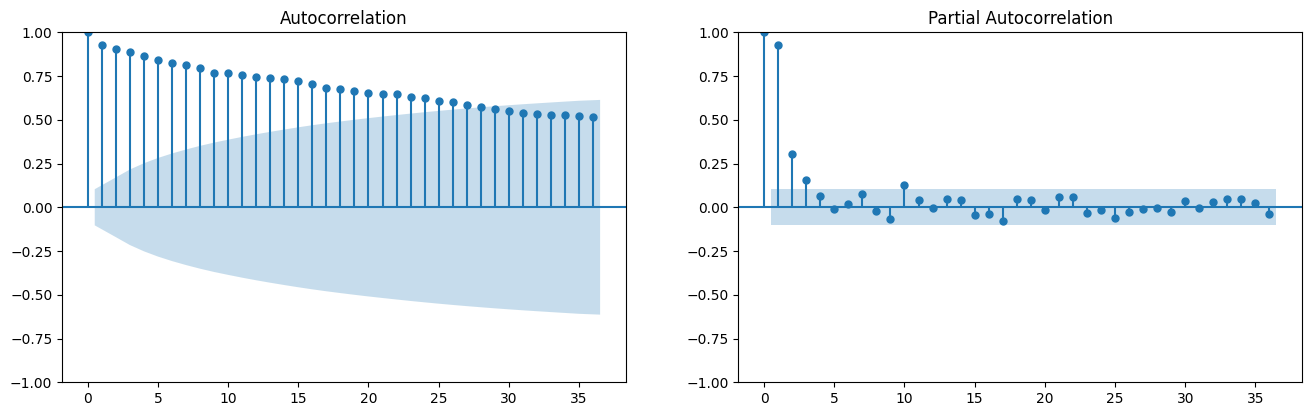

In [26]:
acf_pacf(result_colo_utero.values, 36)

#### Pele

<Axes: xlabel='Data de Diagnostico'>

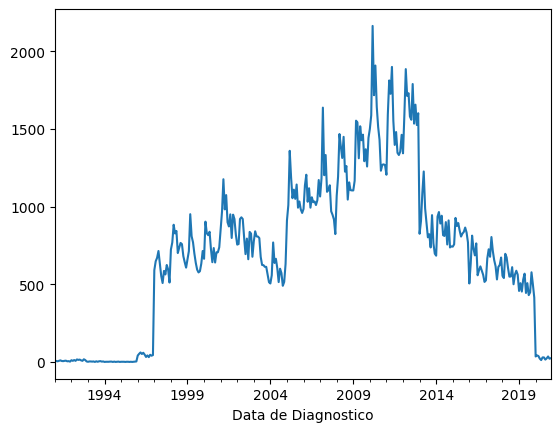

In [27]:
result_pele.plot()

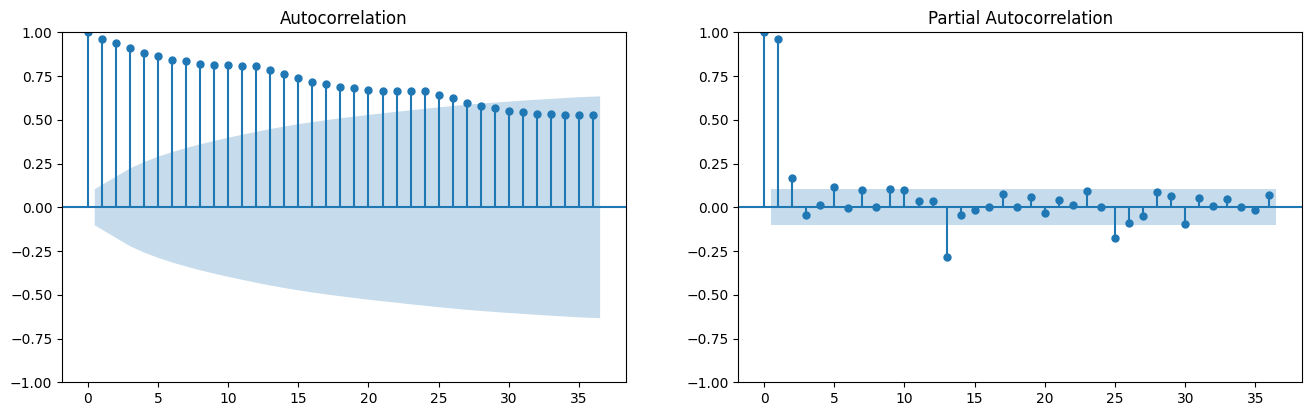

In [28]:
acf_pacf(result_pele.values, 36)

#### Pulmao

<Axes: xlabel='Data de Diagnostico'>

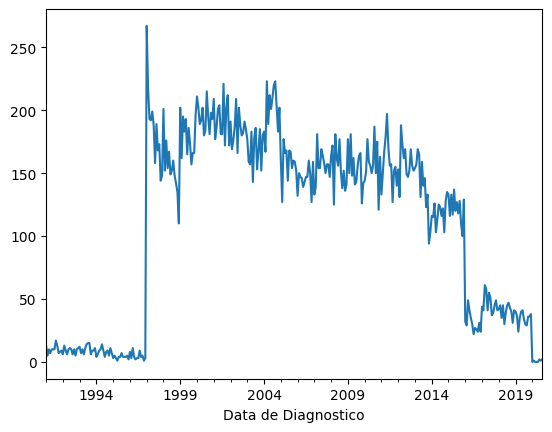

In [29]:
result_pulmao.plot()

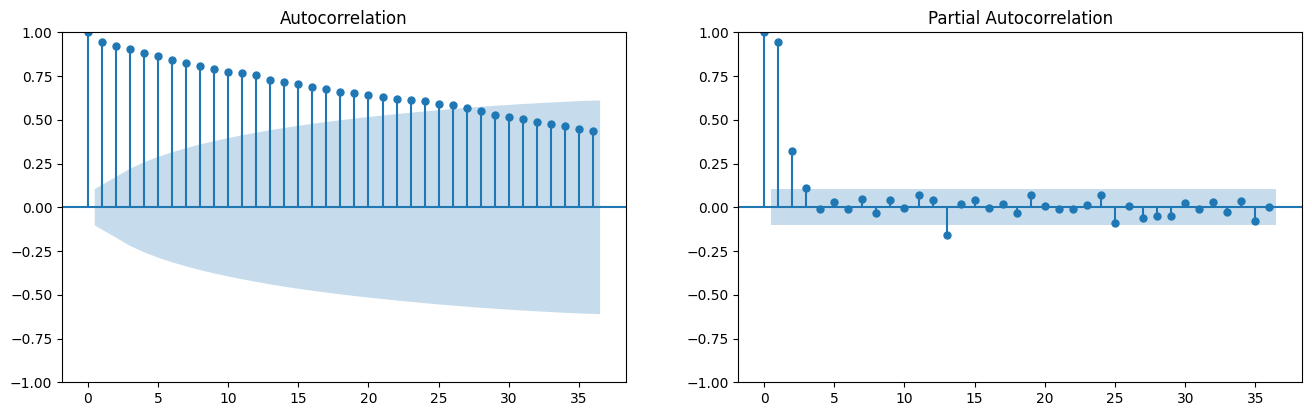

In [30]:
acf_pacf(result_pulmao.values, 36)